<a href="https://colab.research.google.com/github/leehyell/AIStudy24/blob/master/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###시나리오
* MBC 쇼핑몰에서 럭키백을 판매하기로 했다.
* 럭키팩에는 생선이 들어있는데, 종류가 7가지로 랜덤하게 들어 있다.
* 럭키팩에 확률을 표시해야 한다.
    * 들어있는 7가지 생선 확률이 필요함.

In [142]:
#리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치, 적용하는 명령어.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

###k-최근접 알고리즘을 이용하려면 회귀? 분류?

* 럭키백의 확률: 생선 7마리라고 가정.
* 생선의 크기, 길이, 높이, 두께, 대각선의 길이, 무게


* 확률을 알고 싶은 것이므로 회귀를 사용해보자.
* 샘플 10개 중
    * 농어가 3개면? 3 / 10 = 0.3
    * 빙어가 5개면? 5 / 10 = 0.5
    * 도미가 2개면? 2 / 10 = 0.2
    * **0.3 + 0.5 + 0.2 = 1**
* 사이킷런의 k-최근접 이웃 분리기도 이와 동일한 방식으로 확률 계산을 해줌.

In [143]:
#샘플 데이터
#판다스 불러오기
import pandas as pd
#csv파일 읽어오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')
#.head(): 데이터 최상단 5개를 보여줌
fish.head()
#species: 종류 / weight: 무게 / length: 길이 / diagonal: 대각선 / height: 높이 / width: 넓이(두께)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [144]:
# .unique: 유일한 값만 모아서 보는 메소드 명령어
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [145]:
#Bream: 도미 / Roach: 대구 / Whitefish: 잉어 / Parkki: 붕어 / Perch: 농어 / Pike: 가물치 / Smelt: 빙어
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [146]:
#정답 파일 생성
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [147]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
print(train_input.shape, test_input.shape)
#훈련용: 119개, 테스트용: 40개 / 특성은 모두 5개

(119, 5) (40, 5)


In [148]:
from sklearn.preprocessing import StandardScaler
#싸이킷런 전처리용(스케일 조정;표준화)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [149]:
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [150]:
#k-최근접 이웃 알고리즘 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
#훈련용: 0.89%
print(kn.score(train_scaled, train_target))
#테스트: 0.85%
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [151]:
#전에는 0과 1을 찾는 이진분류였으나, 현재는 타겟에 7개 어종을 넣었음.
print(kn.classes_)
#['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
#7개 생선 종류가 들어있음.
#2개 이상의 클래스가 포함된 문제를 다중 분류라고 함.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [152]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [153]:
print(test_scaled[:5])

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [154]:
import numpy as np
#사이킷런이 번거로운 연산을 수행해줌으로써 쉽게 결과가 나옴.
proba = kn.predict_proba(test_scaled[:5])
#소수점 4자리까지 표시(5번째에서 반올림)
print(np.round(proba, decimals=4))

#['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
#1.  0       0        1      0       0       0          0       =>  Perch
#2.  0       0        0      0       0       1          0       =>  Smelt
#3.  0       0        0      1       0       0          0       =>  Pike
#4.  0       0     0.6667    0    0.3333     0          0       =>  Perch
#5.  0       0     0.6667    0    0.3333     0          0       =>  Perch

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [155]:
#모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인이 필요함.
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
#['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
#4.  0       0     0.6667    0    0.3333     0          0       =>  Perch
#Perch 2/3, Roach 1/3 이기 때문에 7개의 확률로 제공되지 못 함.
#이유: n_neighbors=3 으로 했기 때문에.

[['Roach' 'Perch' 'Perch']]


In [156]:
#이로 인해 알고리즘을 변경하겠음.
# → 로지스틱 회귀(Logistic Regression)

###로지스틱 회귀(logistic regression)란?
* **sklearn**(사이킷런)에서 제공함.
* 로지스틱 회귀는 이름은 회귀지만, **분류 모델**임.
* 선형 회귀와 동일하게 선형 방정식을 학습한다.
    * `z = a * weight + b * lenght + c * diagonal + d * height + e * width + f`
    * a, b, c, d, e, f는 각 항목에 대한 **가중치**(중요도, 계수)
    * z는 어떤 값도 가능하지만, 확률이 되려면 **0 ~ 1 사잇값**(0 ~ 100%)
    * z가 아주 큰 음수일 때 0, 아주 큰 양수일 때 1이 되도록 바꾸는 방법: 시그모이드 함수, 로지스틱 함수

* 수학을 사용하여 두 데이터 요인 간의 관계를 찾는 데이터 분석 기법.
* 요인 간의 관계를 사용하여 다른 요인을 기반으로 이러한 요인 중 하나의 값을 예측.

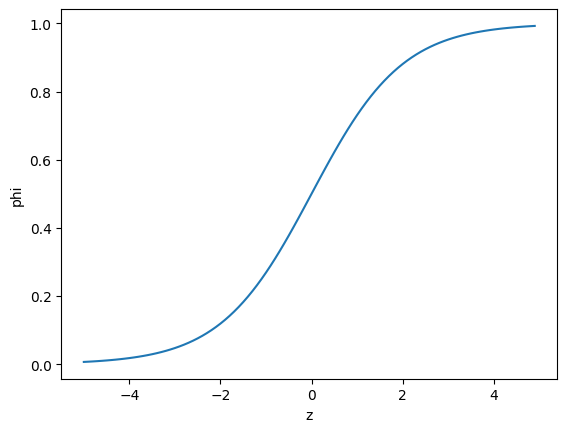

In [157]:
import numpy as np
import matplotlib.pyplot as plt

#시그모이드 함수용:
#z가 무한하게 큰 음수일 경우 0에 가까워짐
#z가 무한하게 큰 양수일 경우 1에 가까워짐
#-5 ~ 5 까지 0.1 간격으로 배열 생성
z = np.arange(-5,5,0.1)
#np.exp() 함수로 시그모이드 적용
phi = 1 / (1 + np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#from sklearn.linear_model import LogisticRegression

###선형방정식의 출력
* z의 음수를 사용하여 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다.
* 이렇게 하면 0 ~ 1 사이 값을 0 ~ 100(%) 확률로 해석할 수 있다.

<br/><br/>
###훈련 전에 2진분류부터 알아보자.
* 2진 분류인 경우에는 시그모이드 함수 출력이 0.5보다 크면 양성, 0.5보다 작으면 음성으로 판단.
* 단, 0.5가 나오면 라이브러리마다 좀 다른데, 사이킷런은 음성으로 판단함.

In [158]:
#로지스틱 회귀로 이진 분류 수행 테스트

#넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. → Boolean Indexing 불리언 인덱싱
char_arr = np.array(['A','B','C','D','E'])
#불리언 인덱싱
print(char_arr[[True,False,True,False,False]])
# → True 값만 출력된다.

['A' 'C']


In [159]:
#이와 같은 방식으로 훈련세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내보자.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
#bream_smelt_indexes에 도미와 방어일 경우 True, 나머지는 False를 넣음.

#이 배열을 사용하여 train_scaled, train_target 배열에 인덱싱을 적용하면
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
#손 쉽게 도미와 빙어 데이터만 골라낼 수 있다.

In [160]:
from sklearn.linear_model import LogisticRegression
#로지스틱회귀 객체 생성.
lr = LogisticRegression()
#훈련 시작.
lr.fit(train_bream_smelt, target_bream_smelt)
#→ 2진분류로 나옴.

LogisticRegression()

In [161]:
#train_bream_smelt 최상단 5개 값으로 결론을 보자.
print(lr.predict(train_bream_smelt[:5]))
#도미4, 빙어1

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [162]:
#확률 확인(.predict_proba)
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [163]:
#샘플마다 2개의 확률이 출력된다.(시그모이드 함수)
#첫 번째 열이 0(음성)에 대한 확률, 두 번째 열(양성)이 1에 대한 확률.
#사이킷런의 타겟 값은 알파벳 순으로 정렬하여 사용.
print(lr.classes_)
#Smelt(빙어)가 양성으로 사용됨.
#두 번째 샘플만 양성 클래스인 빙어의 확률이 높다.(나머지는 도미로 예측.)
#만약 도미(Bream)를 양성 클래스로 사용하고 싶으면?
#전처리에서 Bream 타겟값을 1로 만들어야 함.

['Bream' 'Smelt']


In [164]:
#로지스틱 회귀로 학습한 계수(중요도)를 알아보자.
print(lr.coef_,lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [165]:
#[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
#선형 방정식에 대입해서 결과가 나옴
#z = a * weight + b * lenght + c * diagonal + d * height + e * width + f
#'z = -0.40451732 * weight + -0.57582787 * length + -0.66248158 * diagonal +
# -1.01329614 * height + -0.73123131 * width + -2.16172774' 로 가중치가 결정됨.

#train_bream_smelt 최상단 5개의 z 값을 출력해보자.
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [166]:
#이 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
#파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 있다. -> expit()
from scipy.special import expit

print(expit(decisions))
#↓expit(decisions) 시그모이드화
#phi = 1 / (1 + np.exp(-z))

#여기까지가 2개의 물고기를 분류하는 방법.
#    도미        빙어       도미       도미       도미
#[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [167]:
#다중분류를 진행해보자.
#2진분류는 True or False만 있음.
#현재 어종은 7개기 때문에 로지스틱 회귀로 분류하는 방법을 학습하겠다.

#LogisticRegression 클래스는 기본적으로 반복적인 알고리즘(max_iter=100)을 사용함.
#max_iter=100 반복회수를 100으로 하면 '부족하다'는 경고문구가 나오므로 1000으로 향상.
#로지스틱 회귀는 기본적으로 릿지 회귀 같이 계수를 제곱하는 것을 규제한다.(L2 규제)
#릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했음. → alpha가 크면 규제도 커짐.
#로지스틱 회귀는 규제를 제어하는 매개변수가 c로 되어 있음. → c가 작으면 규제가 커짐.(기본 1)
#규제를 완화하기 위해 c를 20으로 늘리겠음.

#정확도를 높이고자 max_iter는 1000, 규제를 완화하고자 C=20
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#훈련용: 0.9327731092436975
#테스트: 0.925
#과소적합이나 과대적합은 아닌 듯 함.

0.9327731092436975
0.925


In [168]:
print(lr.predict(test_scaled[:5]))
#결과 분석 시 다중 분류로 나옴.

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [169]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

#   Bream Parkki Perch Pike Roach  Smelt Whitefish
# [[0.    0.014 0.842 0.    0.135 0.007 0.003]
#  [0.    0.003 0.044 0.    0.007 0.946 0.   ]
#  [0.    0.    0.034 0.934 0.015 0.016 0.   ]
#  [0.011 0.034 0.305 0.006 0.567 0.    0.076]
#  [0.    0.    0.904 0.002 0.089 0.002 0.001]]

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [170]:
print(lr.classes_)
#알파벳 순으로 정렬되어 나옴.
#7개 클래스가 명확하게 구분됨.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [171]:
#다중분류일 때 선형방정식.
print(lr.coef_.shape,lr.intercept_.shape)
#(7, 5) - 7개의 행을 가지고 있으면서 5개의 특성을 사용함.
#(7,)   - 7개의 행을 가지고 있음.
# → 이진분류에서 보았던 z를 7개 계산함.
# → 다중분류는 클래스마다 z 값을 하나씩 계산한다.
#가장 높은 z 값을 출력하는 클래스가 ^예측 클래스^가 된다.

(7, 5) (7,)


In [172]:
#확률은??
# → 이진분류에서는 시그모이드 함수를 사용하여 z를 0과 1 사잇값으로 변환한다.
# → 다중분류에서는 소프트맥스 함수를 사용하여 7개의 z 값을 확률로 변환한다.
#소프트맥스 계산법
#e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7
#s1 = e^z1 / e_sum, s2 = e^z2 / e_sum ··· s7 = e^z7 / e_sum
# → s1 ~ s7까지 모두 더하면 분모가 같아져 1이 됨.

In [173]:
decisions = lr.decision_function(test_scaled[:5])
print("\t\t    < 5개 샘플에 대한 z1 ~ z7의 값 >\n")
for idx, z in enumerate(decisions):
    print(f"{idx}번째 샘플의 z값\n{z}\n")

		    < 5개 샘플에 대한 z1 ~ z7의 값 >

0번째 샘플의 z값
[-6.50722814  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625859
 -0.62549704]

1번째 샘플의 z값
[-10.87900747   1.94410609   4.77600607  -2.42306183   2.98748716
   7.84171377  -4.24724379]

2번째 샘플의 z값
[-4.33809959 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431898
 -3.87182371]

3번째 샘플의 z값
[-0.69143994  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143404
  1.25700485]

4번째 샘플의 z값
[-6.40138612 -1.99137623  5.81526372 -0.134644    3.49905134 -0.08753485
 -0.69937385]



In [175]:
from scipy.special import softmax
print("소프트맥스 함수로 예측확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decisions, axis=1).round(2) * 100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))

소프트맥스 함수로 예측확률 구하기

  Bream Parkki Perch  Pike Roach Smelt Whitefish  예측 결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
